In [142]:
import pandas as pd

df=pd.read_csv("/Users/devalpatel/Downloads/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [143]:

ct = pd.crosstab(index=[df["WindDir9am"], df["WindDir3pm"]], columns=df["RainTomorrow"], normalize="index", margins=True)
ct.to_csv("1.csv")

In [144]:
df["RainTomorrow"].isnull().sum()

# drop rows with null Target

df = df[df["RainTomorrow"].isin(["Yes","No"])]

df["RainTomorrow"].value_counts()


RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [145]:
# Balancing dataset
from sklearn.utils import resample

df.shape

oversampled = df[df["RainTomorrow"]=="No"]
undersample = df[df["RainTomorrow"]=="Yes"]

undersample = resample(undersample, replace=True, n_samples=len(oversampled), random_state=22)
df = pd.concat([oversampled, undersample])

df.shape

(220632, 23)

/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_1230/112716986.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tmp["RainToday"].replace({"Yes":1, "No": 0}, inplace=True)
/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_1230/112716986.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

(110316, 23)
(220632, 23)
(110316, 23)
(220632, 23)
(110316, 23)
(220632, 23)
(110316, 23)
(220632, 23)
(110316, 23)
(220632, 23)
(110316, 23)
(220632, 23)


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_1230/112716986.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


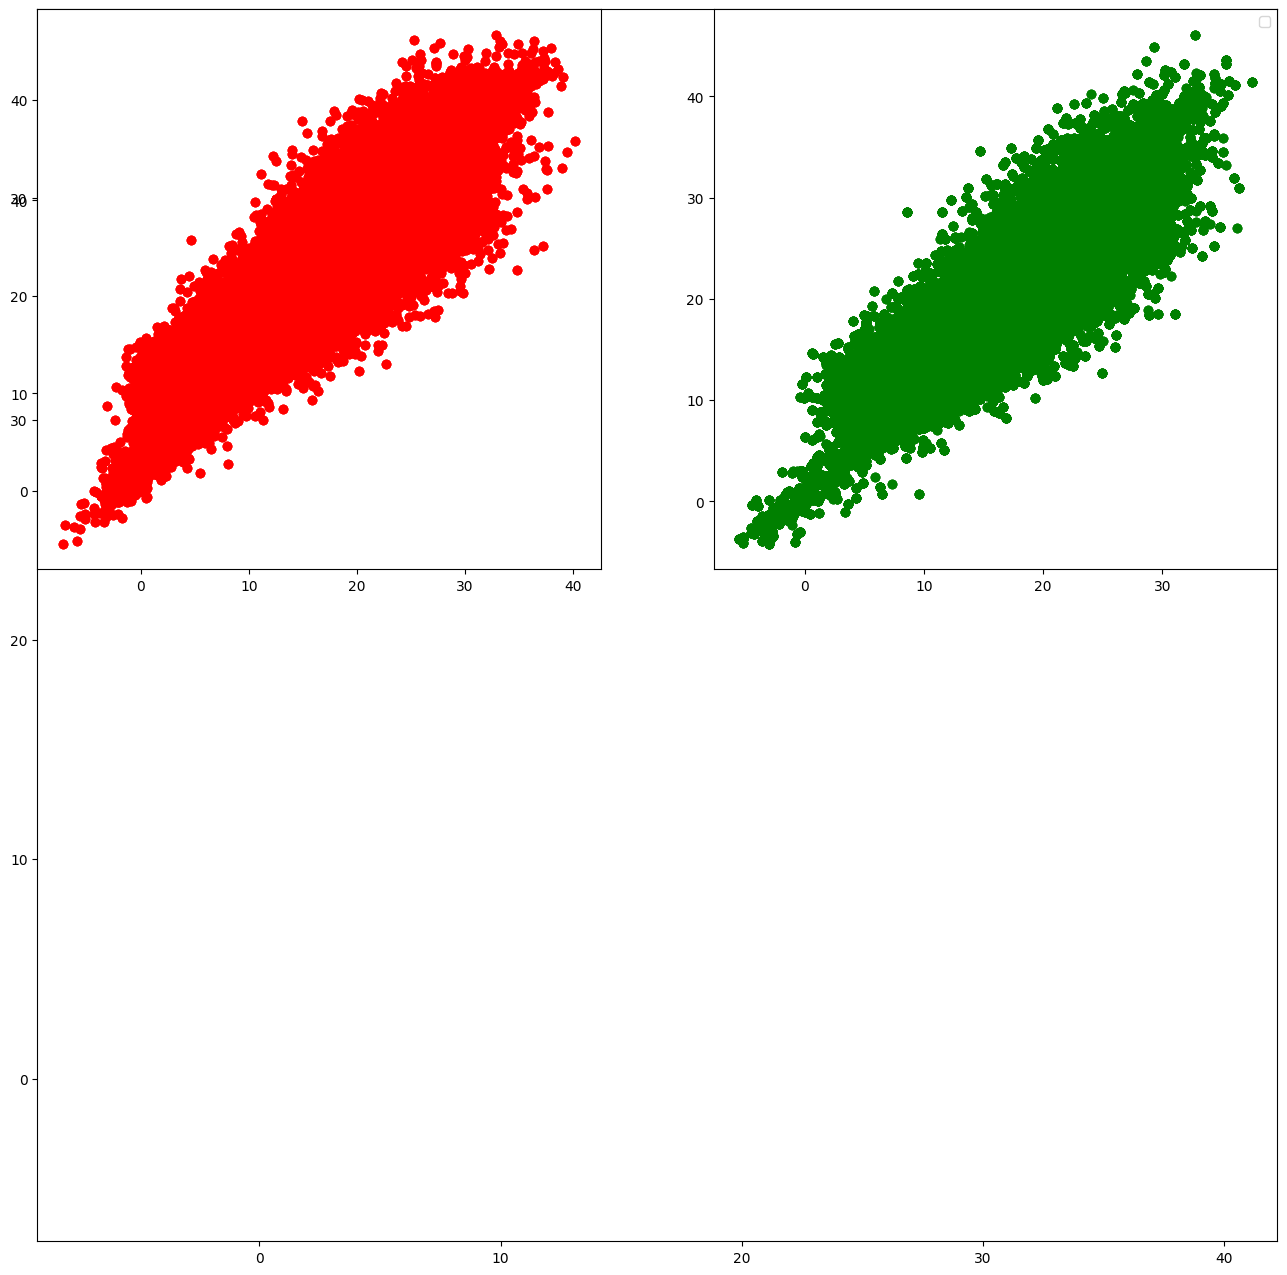

RainTomorrow          No     Yes     All
Location                                
Adelaide            2402    2468    4870
Albany              2114    3132    5246
Albury              2393    2067    4460
AliceSprings        2787     867    3654
BadgerysCreek       2345    2098    4443
Ballarat            2247    2646    4893
Bendigo             2472    1840    4312
Brisbane            2452    2451    4903
Cairns              2038    3197    5235
Canberra            2789    2185    4974
Cobar               2602    1339    3941
CoffsHarbour        2084    2946    5030
Dartmoor            2021    3278    5299
Darwin              2340    2957    5297
GoldCoast           2205    2607    4812
Hobart              2427    2645    5072
Katherine           1294     905    2199
Launceston          2329    2351    4680
Melbourne           1799    2206    4005
MelbourneAirport    2356    2247    4603
Mildura             2680    1101    3781
Moree               2460    1331    3791
MountGambier    

/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_1230/112716986.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CloudMult"].fillna(df["CloudMult"].median(), inplace=True)


In [146]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.figure(figsize=(16, 16))
plt.xlim([df["Temp9am"].min()-2,df["Temp9am"].max()+2])
plt.ylim([df["Temp3pm"].min()-2,df["Temp3pm"].max()+2])


cols = ('red', 'green', 'blue','yellow')
for i, val in enumerate(df["RainToday"].unique()):
    for j, v in enumerate(df["RainTomorrow"].unique()):
        tmp = df[df["RainToday"]==val]
        tmp = df[df["RainTomorrow"]==v]
        tmp["RainToday"].replace({"Yes":1, "No": 0}, inplace=True)
        tmp["RainTomorrow"].replace({"Yes":1, "No": 0}, inplace=True)
        
        print(tmp.shape)
        print(df.shape)
        plt.subplot(2 ,2, j+1).scatter(tmp["Temp9am"], tmp["Temp3pm"], c=ListedColormap(('red', 'green', 'blue','yellow'))(j))

plt.legend()
plt.show()

print(pd.crosstab(index=df["Location"], columns=df["RainTomorrow"], margins=True))


# Adding New Column CloudMult
df["CloudMult"]=df["Cloud9am"]*df["Cloud3pm"]
df["CloudMult"].fillna(df["CloudMult"].median(), inplace=True)

In [147]:
df["Month"]= pd.to_datetime(df["Date"]).dt.month
df.drop(columns="Date", inplace=True)

df_temp = df.copy(deep=True)

print(df.columns)
for col in df.columns:
    if df[col].dtype == "object":
        df_temp=pd.get_dummies(columns=[col],data=df_temp, dummy_na=True, drop_first=True, dtype=int)
    else:
        df_temp[col].fillna(df_temp[col].median(), inplace=True)

from sklearn.model_selection import train_test_split

df_temp_train, df_temp_test = train_test_split(df_temp, test_size=0.22, random_state=0)

df_temp = df_temp_train
y_train = df_temp["RainTomorrow_Yes"]
X_train = df_temp.drop(columns=["RainTomorrow_Yes", "RainTomorrow_nan"], inplace=True)
X_train = df_temp


df_temp = df_temp_test
y_test = df_temp["RainTomorrow_Yes"]
X_test = df_temp.drop(columns=["RainTomorrow_Yes", "RainTomorrow_nan"], inplace=True)
X_test = df_temp


Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'CloudMult', 'Month'],
      dtype='object')


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_1230/690744707.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp[col].fillna(df_temp[col].median(), inplace=True)
/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_1230/690744707.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [148]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1, n_estimators=100)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [149]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_true=y_test, y_pred=pred))
print(confusion_matrix(y_true=y_test, y_pred=pred))

0.9469097651421507
[[22178  1989]
 [  588 23785]]
